# Train Interspeech

## Data

In [19]:
balanced = True

In [20]:
import pandas as pd

# Cargar el CSV para male
data = pd.read_csv('data/data_male.csv')
print(len(data))
# Eliminar filas con valores nulos solo en la columna 'text'
data = data.dropna(subset=['text'])
#data.to_csv('data/data_male.csv', index=False)
print(len(data))
data.head()

19837
19837


,FileName,text,EmoClass,EmoAct,EmoVal,EmoDom,SpkrID,Gender,Split_Set,PodcastID,StratifyCol,NewPartition,PseudoEmo,InvEntropyNorm,PseudoEmoNum
0,MSP-PODCAST_0288_0019,"mr. [excess 00:01:24] also known as ike, bbc r...",H,5.333333,5.416667,4.750000,123,Male,Train,288,0288_123_H,Train,H,1.000000,1
1,MSP-PODCAST_3371_0004_0001,... i decided to take a trip to canada with my...,N,3.400000,4.800000,4.200000,1769,Male,Development,3371,3371_1769_N,Evaluation,N,1.000000,0
2,MSP-PODCAST_0153_0436,"just clowning in the studio, people.",H,5.777778,5.111111,5.444444,15,Male,Train,153,0153_15_H,Evaluation,H,1.000000,1
3,MSP-PODCAST_2979_0216,social distancing implies that we're being dis...,X,3.200000,4.000000,3.600000,1565,Male,Train,2979,2979_1565_X,Evaluation,N,0.246159,0
4,MSP-PODCAST_0917_0196,... in 2016. we won. okay. and our core messag...,N,4.800000,3.600000,4.800000,266,Male,Train,917,0917_266_N,Train,N,1.000000,0


In [21]:
if balanced:
    # Paso 1: Determinar el tamaño mínimo entre las clases
    min_count = data['PseudoEmo'].value_counts().min()

    # Paso 2: Submuestrear cada clase
    data = data.groupby('PseudoEmo').apply(lambda x: x.sample(min_count)).reset_index(drop=True)

    # Paso 3: Verificar el balance
    print(data['PseudoEmo'].value_counts())
    print(len(data))

    #data.to_csv('data/balanced_pseudo_male.csv', index=False)


PseudoEmo
A    798
C    798
D    798
F    798
H    798
N    798
S    798
U    798
Name: count, dtype: int64
6384


/tmp/ipykernel_1922612/501059733.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('PseudoEmo').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


In [15]:
# Filtrar los datos en tres conjuntos basados en la columna 'Split_Set'
train_df = data.loc[data['NewPartition'] == 'Train']
dev_df = data.loc[data['NewPartition'] == 'Evaluation']
test_df = data.loc[data['NewPartition'] == 'Test']

# Verifica las primeras filas de cada conjunto
print("Conjunto Train:")
print(train_df.head())

print("Conjunto Development:")
print(dev_df.head())

print("Conjunto Test:")
print(test_df.head())

Conjunto Train:
                FileName                                               text  \
0  MSP-PODCAST_0288_0019  mr. [excess 00:01:24] also known as ike, bbc r...   
4  MSP-PODCAST_0917_0196  ... in 2016. we won. okay. and our core messag...   
5  MSP-PODCAST_0040_0223   all those decent men and women around the wor...   
7  MSP-PODCAST_1702_0156  yeah. it's like they're in some sort of geomet...   
8  MSP-PODCAST_5495_0498  that's a very good point of view. i love that....   

  EmoClass    EmoAct    EmoVal    EmoDom  SpkrID Gender    Split_Set  \
0        H  5.333333  5.416667  4.750000     123   Male        Train   
4        N  4.800000  3.600000  4.800000     266   Male        Train   
5        N  2.750000  3.666667  3.666667     425   Male        Train   
7        N  5.000000  4.200000  5.600000     981   Male  Development   
8        H  4.800000  5.400000  4.800000    2865   Male        Train   

   PodcastID  StratifyCol NewPartition PseudoEmo  InvEntropyNorm  PseudoEmoN

In [5]:
# # Establecer la semilla para garantizar reproducibilidad
# seed = 42

# # Seleccionar aleatoriamente las primeras N filas del conjunto de entrenamiento
# train_df = train_df.sample(n=1000, random_state=seed)

# # Seleccionar aleatoriamente las primeras N filas del conjunto de desarrollo
# dev_df = dev_df.sample(n=250, random_state=seed)

In [16]:
num_labels = 8
id2label = dict(zip(train_df["PseudoEmoNum"], train_df["PseudoEmo"]))
label2id = dict(zip(train_df["PseudoEmo"], train_df["PseudoEmoNum"]))
print(f"{id2label=}")
print(f"{label2id=}")

id2label={1: 'H', 0: 'N', 3: 'S', 7: 'F', 2: 'A', 4: 'C', 5: 'U', 6: 'D'}
label2id={'H': 1, 'N': 0, 'S': 3, 'F': 7, 'A': 2, 'C': 4, 'U': 5, 'D': 6}


In [7]:
# Convertir EmoClass a valores numéricos si es necesario
train_df['PseudoEmoNum'] = train_df['PseudoEmoNum'].astype(int)
dev_df['PseudoEmoNum'] = dev_df['PseudoEmoNum'].astype(int)
test_df['PseudoEmoNum'] = test_df['PseudoEmoNum'].astype(int)

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_70448/2335822977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['PseudoEmoNum'] = train_df['PseudoEmoNum'].astype(int)
/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_70448/2335822977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_df['PseudoEmoNum'] = dev_df['PseudoEmoNum'].astype(int)
/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_70448/2335822977.py:4: SettingWithCopyWarning: 
A value is trying to be s

In [8]:
from datasets import Dataset
from transformers import AutoTokenizer

# Modelo
model_ckpt = "distilbert-base-uncased"

# Cargar el tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

# Función para tokenizar los datos
def tokenize_function(examples):
    # Verificar que estamos pasando una lista de textos
    texts = examples['text']
    return tokenizer(texts, padding="max_length", truncation=True)

# Asegurarse de que 'train_df' y 'dev_df' son objetos Dataset de Hugging Face
train_dataset = Dataset.from_pandas(train_df)
dev_dataset = Dataset.from_pandas(dev_df)
test_dataset = Dataset.from_pandas(test_df)


# Tokenizamos ambos conjuntos de datos
train_dataset = train_dataset.map(tokenize_function, batched=True)
dev_dataset = dev_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)


# Renombrar columna de labels
train_dataset = train_dataset.rename_column("PseudoEmoNum", "labels")
dev_dataset = dev_dataset.rename_column("PseudoEmoNum", "labels")
test_dataset = test_dataset.rename_column("PseudoEmoNum", "labels")


/Users/jorgegarcelan/Desktop/UNI/6-LAB TSC/interspeech-nlp/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/jorgegarcelan/Desktop/UNI/6-LAB TSC/interspeech-nlp/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Map: 100%|██████████| 5408/5408 [00:00<00:00, 15176.91 examples/s]


## Code

In [9]:
from transformers import AutoTokenizer
import torch
print(torch.__version__)  # Esto debería mostrarte la versión de PyTorch instalada

2.5.1


In [10]:
from transformers import AutoModelForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device)
print(model.num_labels)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


8


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    
    # Obtener reporte completo
    report = classification_report(labels, predictions, output_dict=True)
    
    # Obtener la matriz de confusión
    conf_matrix = confusion_matrix(labels, predictions)
    
    # Extraer métricas para cada clase y globales
    metrics = {
        'accuracy': report['accuracy'],
        'macro_f1': report['macro avg']['f1-score'],
        'weighted_f1': report['weighted avg']['f1-score'],
        # 'weighted_precision': report['weighted avg']['precision'],
        # 'weighted_recall': report['weighted avg']['recall'],
        'confusion_matrix': conf_matrix.tolist()  # Convertir a lista para asegurarse de que es serializable si es necesario
    }
    
    # # Añadir métricas específicas por clase si se requiere
    # for label, scores in report.items():
    #     if label not in ["accuracy", "macro avg", "weighted avg"]:
    #         metrics[f'{label}_precision'] = scores['precision']
    #         metrics[f'{label}_recall'] = scores['recall']
    #         metrics[f'{label}_f1'] = scores['f1-score']
    #         metrics[f'{label}_support'] = scores['support']
    
    return metrics

In [12]:
from transformers import Trainer, TrainingArguments

batch_size = 32
logging_steps = len(train_dataset) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=10,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    #push_to_hub=True,
    log_level="error"
)

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=dev_dataset,
    tokenizer=tokenizer
)

/Users/jorgegarcelan/Desktop/UNI/6-LAB TSC/interspeech-nlp/.venv/lib/python3.9/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_70448/401939393.py:20: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [13]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Macro F1,Weighted F1,Confusion Matrix
1,1.580300,1.446529,0.502483,0.219284,0.438805,"[[1454, 197, 138, 25, 0, 0, 0, 0], [496, 388, 83, 7, 0, 0, 0, 0], [205, 39, 344, 12, 0, 0, 0, 0], [238, 10, 63, 40, 0, 0, 0, 0], [76, 21, 53, 4, 0, 0, 0, 0], [183, 57, 41, 6, 0, 0, 0, 0], [58, 14, 41, 4, 0, 0, 0, 0], [86, 13, 29, 5, 0, 0, 0, 0]]"
2,1.399300,1.429042,0.501806,0.221668,0.440105,"[[1449, 201, 123, 41, 0, 0, 0, 0], [499, 386, 82, 7, 0, 0, 0, 0], [194, 41, 340, 25, 0, 0, 0, 0], [230, 11, 62, 48, 0, 0, 0, 0], [76, 21, 51, 6, 0, 0, 0, 0], [190, 54, 38, 5, 0, 0, 0, 0], [59, 16, 36, 6, 0, 0, 0, 0], [82, 16, 28, 7, 0, 0, 0, 0]]"
3,1.240700,1.494005,0.502935,0.230154,0.443555,"[[1492, 138, 96, 88, 0, 0, 0, 0], [539, 332, 81, 22, 0, 0, 0, 0], [217, 27, 308, 48, 0, 0, 0, 0], [214, 3, 38, 96, 0, 0, 0, 0], [80, 12, 48, 13, 0, 1, 0, 0], [197, 44, 33, 13, 0, 0, 0, 0], [56, 11, 34, 16, 0, 0, 0, 0], [79, 13, 27, 14, 0, 0, 0, 0]]"


/Users/jorgegarcelan/Desktop/UNI/6-LAB TSC/interspeech-nlp/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jorgegarcelan/Desktop/UNI/6-LAB TSC/interspeech-nlp/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jorgegarcelan/Desktop/UNI/6-LAB TSC/interspeech-nlp/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

KeyboardInterrupt: 

In [13]:
preds_output = trainer.predict(test_dataset)
preds_metrics = preds_output.metrics
preds_metrics

{'test_loss': 2.299729108810425,
 'test_accuracy': 0.19751499571550984,
 'test_macro_f1': 0.20161159223550434,
 'test_weighted_f1': 0.19359108409347964,
 'test_confusion_matrix': [[40, 27, 8, 19, 8, 16, 2, 5],
  [40, 69, 9, 7, 4, 19, 7, 8],
  [26, 9, 57, 28, 12, 18, 24, 18],
  [58, 22, 38, 91, 18, 23, 33, 34],
  [76, 30, 78, 70, 47, 39, 52, 40],
  [99, 46, 32, 27, 27, 56, 16, 24],
  [50, 22, 72, 81, 52, 35, 62, 42],
  [84, 25, 43, 89, 26, 30, 26, 39]],
 'test_runtime': 69.9158,
 'test_samples_per_second': 33.383,
 'test_steps_per_second': 1.044}

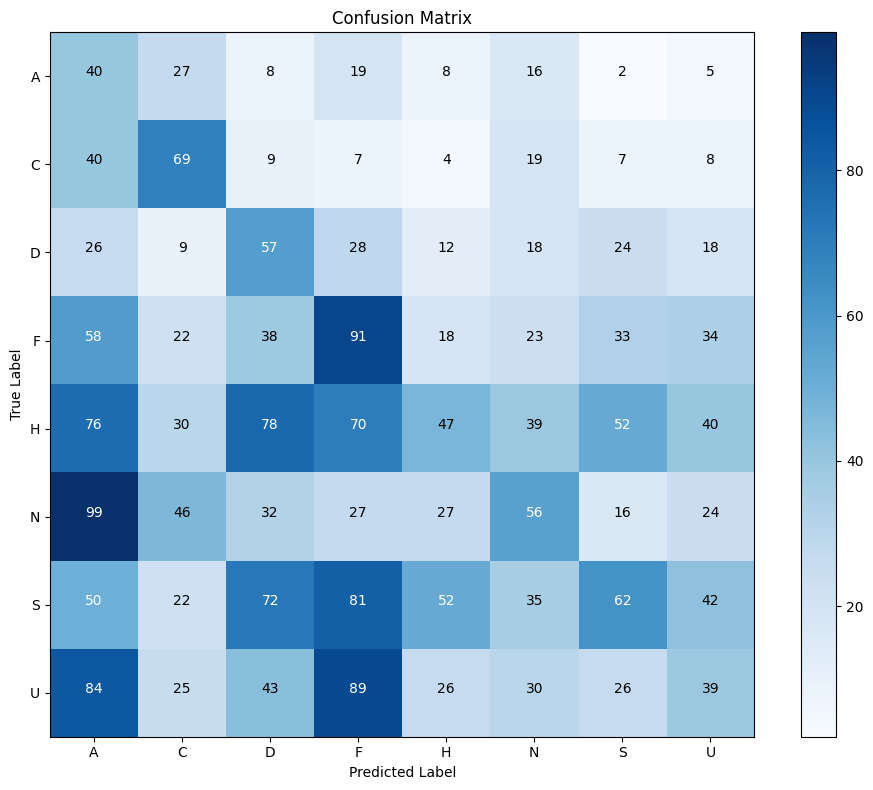

In [14]:
import matplotlib.pyplot as plt
import numpy as np

labels = label2id.keys()
conf_matrix = preds_metrics['test_confusion_matrix']

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Agregar etiquetas
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Rótulos de valores dentro de cada celda
conf_matrix = np.array(conf_matrix)

# Calcular el umbral
thresh = conf_matrix.max() / 2
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(
        j, i, format(conf_matrix[i, j], 'd'),
        horizontalalignment="center",
        color="white" if conf_matrix[i, j] > thresh else "black"
    )

# Etiquetas de los ejes
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()